# CS105/305    Lab 3   -  Pandas on Ice

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The National Snow and Ice Data Center (https://nsidc.org/) maintains a lot of information about snow and ice.  One of their datasets concerns "sea ice," that is, ice which is floating on some ocean or other seawater body.  Almost all of this is either in the Arctic or Antarctic regions and, as you can imagine, the extent of the ice changes over the course of each year.  It's also changing in longer timeframes and this has attracted quite a lot of attention from climate scientists.  We're going to look at some data on the extent of Arctic ice.  There's a nifty tool for visualizing the data we're going to look at here: https://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/

Begin by having a look at https://nsidc.org/data/g02135 and downloading the data file for this lab.  

Load the data into Pandas - you might want to look at some of the options to read_csv()

In [3]:
#read in the data
lab_3 = pd.read_csv('/content/Lab_3.csv', skiprows = [1] ) #skiprows removes extra header row also rename csv

#Make dataframe
df = pd.DataFrame(lab_3)
df

,Year,Month,Day,Extent,Missing,Source Data
0,1978,10,26,10.231,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
1,1978,10,28,10.420,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
2,1978,10,30,10.557,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
3,1978,11,1,10.670,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
4,1978,11,3,10.777,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...
...,...,...,...,...,...,...
14169,2022,2,19,14.712,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.18/nt_202...
14170,2022,2,20,14.729,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.19/nt_202...
14171,2022,2,21,14.933,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.20/nt_202...
14172,2022,2,22,14.923,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.21/nt_202...


Use info() and head() to get a look at the data.  Also look at the columns attribute of your DataFrame.

In [4]:
df.info() #displays basic information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14174 entries, 0 to 14173
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          14174 non-null  int64  
 1    Month        14174 non-null  int64  
 2    Day          14174 non-null  int64  
 3        Extent   14174 non-null  float64
 4       Missing   14174 non-null  float64
 5    Source Data  14174 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 664.5+ KB


In [5]:
df.head(n = 5) #calls first five rows

,Year,Month,Day,Extent,Missing,Source Data
0,1978,10,26,10.231,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
1,1978,10,28,10.420,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
2,1978,10,30,10.557,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
3,1978,11,1,10.670,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
4,1978,11,3,10.777,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...


Find out what years are represented in this dataset.

In [6]:
#Identify unique values to find out number of years
c = df['Year'].unique()
c

array([1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

Check the labels on the columns and if they have spaces in them, remove the spaces

In [7]:
# Check labels
df.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data'], dtype='object')

In [8]:
#Set New Columns
df.columns = ('Year', 'Month', 'Day', 'Extent', 'Missing', 'Source Data')
df

,Year,Month,Day,Extent,Missing,Source Data
0,1978,10,26,10.231,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
1,1978,10,28,10.420,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
2,1978,10,30,10.557,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
3,1978,11,1,10.670,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
4,1978,11,3,10.777,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...
...,...,...,...,...,...,...
14169,2022,2,19,14.712,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.18/nt_202...
14170,2022,2,20,14.729,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.19/nt_202...
14171,2022,2,21,14.933,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.20/nt_202...
14172,2022,2,22,14.923,0.0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.21/nt_202...


In [9]:
#Assess if corrected
df.columns

Index(['Year', 'Month', 'Day', 'Extent', 'Missing', 'Source Data'], dtype='object')

Drop the Missing and Source Data columns from the data, leaving the other columns.

In [10]:
#Drop the Rows
upgrade = df.drop(columns = ['Missing', 'Source Data'])
upgrade

,Year,Month,Day,Extent
0,1978,10,26,10.231
1,1978,10,28,10.420
2,1978,10,30,10.557
3,1978,11,1,10.670
4,1978,11,3,10.777
...,...,...,...,...
14169,2022,2,19,14.712
14170,2022,2,20,14.729
14171,2022,2,21,14.933
14172,2022,2,22,14.923


Build a subset of the data with only rows from 2021

In [11]:
#Creating subset for 2021
sub2021 = upgrade[upgrade["Year"] == 2021]
sub2021

,Year,Month,Day,Extent
13757,2021,1,1,12.702
13758,2021,1,2,12.671
13759,2021,1,3,12.704
13760,2021,1,4,12.770
13761,2021,1,5,12.814
...,...,...,...,...
14115,2021,12,27,12.947
14116,2021,12,28,12.978
14117,2021,12,29,13.050
14118,2021,12,30,13.149


Plot the Extent column for this subset

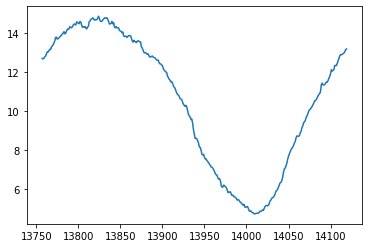

In [12]:
#Plot 2021
sub2021.Extent.plot()

It turns out that the minimum extent is always sometime in September.  Build a version of the dataset with only the month of September for each year.

In [13]:
#Creating a subset of 2021 data just for September
subsept = upgrade[upgrade["Month"] == 9]
subsept

,Year,Month,Day,Extent
155,1979,9,1,7.228
156,1979,9,3,7.147
157,1979,9,5,7.037
158,1979,9,7,7.075
159,1979,9,9,7.092
...,...,...,...,...
14023,2021,9,26,5.131
14024,2021,9,27,5.145
14025,2021,9,28,5.120
14026,2021,9,29,5.138


Plot just the extent for September in 2021.  You should see that the minimum was on the 13th.  

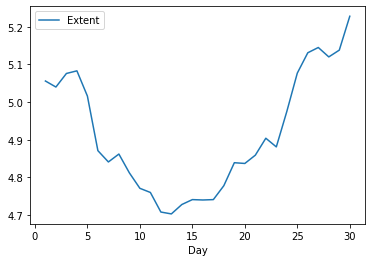

In [14]:
#Plot September 2021
sep2021 = sub2021[sub2021['Month'] == 9]
sep2021.plot(x = 'Day', y = 'Extent')

For each year, find the day (number starting with 1) of the minimum value.

In [15]:
#Identify the Minimum Values in Year
minday = upgrade.groupby(['Year']).min() 

#Drop Unnessecary Columns
minf = minday.drop(columns = ['Day', 'Month'])

#Join with original dataframe
mine = pd.merge(upgrade, minf, on = 'Year', how='inner')

#Filter rows that don't match the minimum extent
mines = mine.where(mine['Extent_y']==mine['Extent_x'])

#Clean up data and drop NA
f = mines.dropna()
f

,Year,Month,Day,Extent_x,Extent_y
0,1978.0,10.0,26.0,10.231,10.231
165,1979.0,9.0,21.0,6.895,6.895
340,1980.0,9.0,5.0,7.533,7.533
525,1981.0,9.0,10.0,6.902,6.902
709,1982.0,9.0,13.0,7.160,7.160
889,1983.0,9.0,8.0,7.204,7.204
1076,1984.0,9.0,16.0,6.396,6.396
1255,1985.0,9.0,9.0,6.486,6.486
1436,1986.0,9.0,6.0,7.122,7.122
1623,1987.0,9.0,2.0,6.890,6.890


Create a plot of the minimum day for all the years in the set (skip any year with no September data) 

In [16]:
#Remove years with no September dates
septdays =  f[f["Month"] == 9]
septdays

,Year,Month,Day,Extent_x,Extent_y
165,1979.0,9.0,21.0,6.895,6.895
340,1980.0,9.0,5.0,7.533,7.533
525,1981.0,9.0,10.0,6.902,6.902
709,1982.0,9.0,13.0,7.160,7.160
889,1983.0,9.0,8.0,7.204,7.204
1076,1984.0,9.0,16.0,6.396,6.396
1255,1985.0,9.0,9.0,6.486,6.486
1436,1986.0,9.0,6.0,7.122,7.122
1623,1987.0,9.0,2.0,6.890,6.890
1957,1988.0,9.0,11.0,7.048,7.048


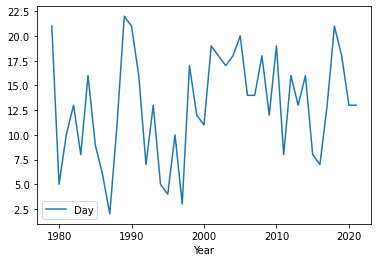

In [17]:
#Plot Dates
septdays.plot(x ='Year', y= 'Day')

Find out which month(s) have had maximum extent values.  

In [18]:
#Identify the Maximum Values in a Year
maxday = upgrade.groupby(['Year']).max()

#Drop unnessecary columns
maxf = maxday.drop(columns = ['Day', 'Month'])

##Join with original dataframe
maxe = pd.merge(upgrade, maxf, on = 'Year')

#Filter rows that don't match the maximum extent
maxes = mine.where(maxe['Extent_y']== maxe['Extent_x'])

#Clean and Drop NA
f2 = maxes.dropna()
f2

#Max month for full years are February or March

#Unsure why Extent_y changes value for f2 but values are correct throgh maxe 
#and align with random testing

,Year,Month,Day,Extent_x,Extent_y
33,1978.0,12.0,31.0,14.585,10.231
63,1979.0,3.0,1.0,16.635,6.895
248,1980.0,3.0,5.0,16.302,7.533
435,1981.0,3.0,14.0,15.801,6.902
610,1982.0,2.0,27.0,16.325,7.160
800,1983.0,3.0,14.0,16.412,7.204
985,1984.0,3.0,18.0,15.809,6.396
1167,1985.0,3.0,17.0,16.163,6.486
1346,1986.0,3.0,10.0,16.158,7.122
1520,1987.0,2.0,21.0,16.293,6.890


For the most common maximum month, repeat the work above and create another plot.

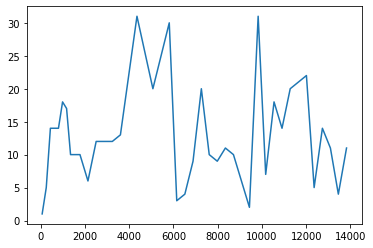

In [19]:
#Most Common Max is Visibly Observable as March
marchdays =  f2[f2["Month"] == 3]
marchdays.Day.plot()

Build a scatter plot of minimum day vs. minimum extent.  Do you see a pattern?

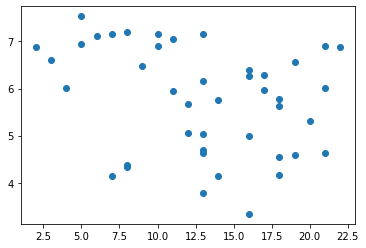

In [20]:
#There appears to be a trend towards latter dates if the extent is smaller
plt.scatter(x = septdays.Day , y = septdays.Extent_x)

**START LAB 4:** Beginning with a copy of your notebook for lab 3, generate data and scatter plots for:



1) The minimum extent for each year in the original dataset (except 1978 and 2022 which have no September data)




In [21]:
sep2 = septdays[['Year', 'Extent_x']]
sep2

,Year,Extent_x
165,1979.0,6.895
340,1980.0,7.533
525,1981.0,6.902
709,1982.0,7.160
889,1983.0,7.204
1076,1984.0,6.396
1255,1985.0,6.486
1436,1986.0,7.122
1623,1987.0,6.890
1957,1988.0,7.048


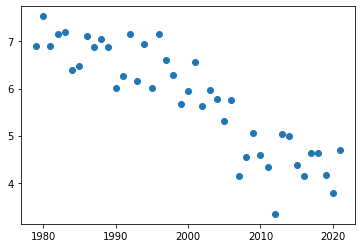

In [22]:
#Scatter Plot
plt.scatter(x = sep2.Year , y = sep2.Extent_x)

Now do linear regression on this data and plot the line onto the scatter plot.

In [24]:
from sklearn.linear_model import LinearRegression
#Set X and Y
X = sep2[['Year']]
y = sep2[['Extent_x']]

lin_reg = LinearRegression()   # Construct a model
lin_reg.fit(X, y)              # Fit the model to the data
lin_reg.intercept_, lin_reg.coef_ 

(array([167.2433428]), array([[-0.08073558]]))

2) The day of the month (in September) where the minimum occured.

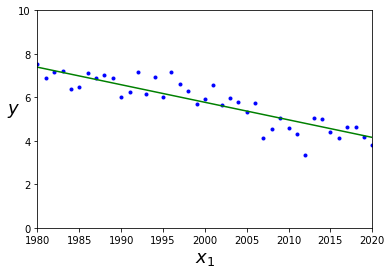

In [25]:
plt.plot(X, y, "b.")    # replacement for scatter()
X_true = np.asarray([[1980], [2020]])
Y_true = 167.2433428 + -0.08073558*X_true
plt.plot(X_true, Y_true, "g-")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([1980, 2020, 0, 10])
plt.show()

In [26]:
#Remove extra
minday2 = septdays[['Day', 'Extent_x']]

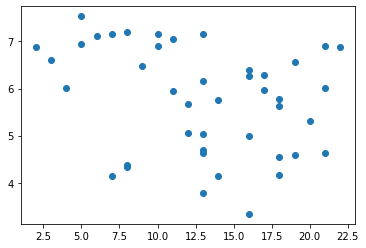

In [27]:
#Scatter Plot
plt.scatter(x = minday2.Day , y = minday2.Extent_x)

Now do linear regression on this data and plot the line onto the scatter plot.

In [28]:
from sklearn.linear_model import LinearRegression
#Set X and Y
X = minday2[['Day']]
y = minday2[['Extent_x']]

lin_reg = LinearRegression()   # Construct a model
lin_reg.fit(X, y)              # Fit the model to the data
lin_reg.intercept_, lin_reg.coef_  

(array([6.54219596]), array([[-0.05944421]]))

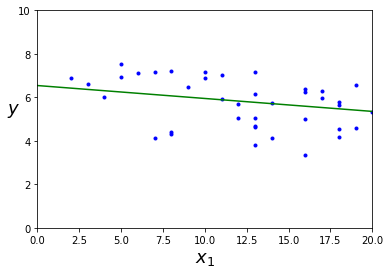

In [29]:
plt.plot(X, y, "b.")    # replacement for scatter()
X_true = np.asarray([[0], [20]])
Y_true = 6.54219596  + -0.05944421*X_true
plt.plot(X_true, Y_true, "g-")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 20, 0, 10])
plt.show()

Submit your work as an attachment in email by Friday, March 4th at 11:59PM.  